# EQUITY BASKET OPTIONS - VALUATION ANALYSIS

Valuation and Risk of Equity Basket Options in which the option is on a basket of stocks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.market.curves import *
from financepy.products.equity import *

####################################################################
# FINANCEPY BETA Version 0.33 - This build:  11 Nov 2023 at 07:47 #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



# Homogeneous Basket

All the assets in the basket have the same characteristicsm

In [3]:
num_assets = 5

In [4]:
expiry_date = Date(1, 1, 2021)

In [5]:
strike_price = 100.0

In [6]:
basketCallOption = EquityBasketOption(expiry_date,  strike_price, 
                                         OptionTypes.EUROPEAN_CALL, num_assets)

In [7]:
basketPutOption = EquityBasketOption(expiry_date,  strike_price, 
                                        OptionTypes.EUROPEAN_PUT, num_assets)

In [8]:
print(basketCallOption)

OBJECT TYPE: EquityBasketOption
EXPIRY DATE: 01-JAN-2021
STRIKE PRICE: 100.0
OPTION TYPE: OptionTypes.EUROPEAN_CALL
NUM ASSETS: 5


In [9]:
print(basketPutOption)

OBJECT TYPE: EquityBasketOption
EXPIRY DATE: 01-JAN-2021
STRIKE PRICE: 100.0
OPTION TYPE: OptionTypes.EUROPEAN_PUT
NUM ASSETS: 5


## Valuation

In [10]:
value_date = Date(1, 1, 2020)

In [11]:
interest_rate = 0.05

In [12]:
discount_curve = DiscountCurveFlat(value_date, interest_rate)

In [13]:
volatility = 0.20
dividend_yield = 0.01
stock_price = 100.0

In [14]:
dividend_curve = DiscountCurveFlat(value_date, dividend_yield)

We examine how the price depends on the stock price

In [15]:
volatilities = np.ones(num_assets) * volatility
dividend_yields = np.ones(num_assets) * dividend_yield
stock_prices = np.ones(num_assets) * stock_price

dividend_curves = []
for dividend_yield in dividend_yields:
    dividend_curves.append(DiscountCurveFlat(value_date, dividend_yield))

valuesCall = []
valuesPut = []
valuesCallMC = []
valuesPutMC = []

svector = np.linspace(50,150, 100)

for s in svector:

    stock_prices = np.ones(num_assets) * s
    beta_vector = np.ones(num_assets) * 0.6
    corr_matrix = beta_vector_to_corr_matrix(beta_vector)

    vcall = basketCallOption.value(value_date, stock_prices, discount_curve, 
                                   dividend_curves, volatilities, corr_matrix)
    
    vput = basketPutOption.value(value_date, stock_prices, discount_curve, 
                                 dividend_curves, volatilities, corr_matrix)

    vcallmc = basketCallOption.value_mc(value_date, stock_prices, discount_curve, 
                                   dividend_curves, volatilities, corr_matrix)
    
    vputmc = basketPutOption.value_mc(value_date, stock_prices, discount_curve, 
                                 dividend_curves, volatilities, corr_matrix)

    valuesCall.append(vcall)
    valuesPut.append(vput)
    valuesCallMC.append(vcallmc)
    valuesPutMC.append(vputmc)


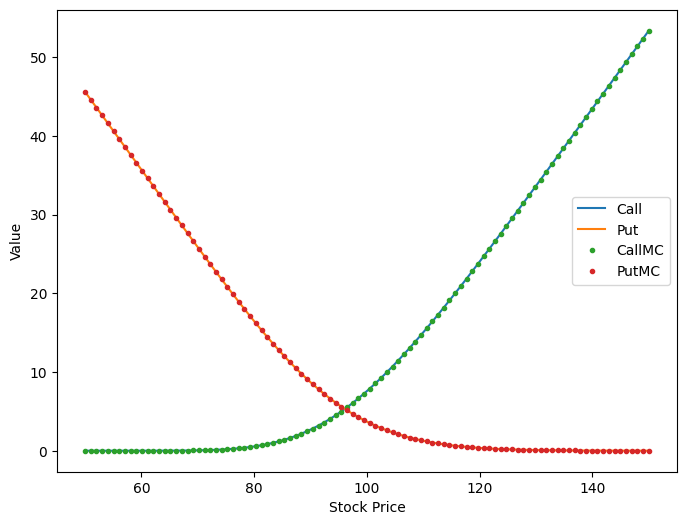

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(svector, valuesCall, label="Call");
plt.plot(svector, valuesPut, label="Put");
plt.plot(svector, valuesCallMC, '.', label="CallMC");
plt.plot(svector, valuesPutMC, '.', label="PutMC");
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend();

We see the usual payoff we would expect and that the Monte Carlo agrees closely with the analytical approach.

## Examining the Role of Correlation

We examine the dependency of the basket option price on the inter-asset correlation.

In [17]:
valuesCall = []
valuesPut = []
valuesCallMC = []
valuesPutMC = []

stock_price = 100.0
stock_prices = np.ones(num_assets) * stock_price

betas = np.linspace(0.0, 0.90, 20)

for beta in betas:

    beta_vector = np.ones(num_assets) * beta
    corr_matrix = beta_vector_to_corr_matrix(beta_vector)

    vcall = basketCallOption.value(value_date, stock_prices, discount_curve, 
                                   dividend_curves, volatilities, corr_matrix)
    
    vput = basketPutOption.value(value_date, stock_prices, discount_curve, 
                                 dividend_curves, volatilities, corr_matrix)

    vcallmc = basketCallOption.value_mc(value_date, stock_prices, discount_curve, 
                                   dividend_curves, volatilities, corr_matrix)
    
    vputmc = basketPutOption.value_mc(value_date, stock_prices, discount_curve, 
                                 dividend_curves, volatilities, corr_matrix)

    valuesCall.append(vcall)
    valuesPut.append(vput)
    valuesCallMC.append(vcallmc)
    valuesPutMC.append(vputmc)

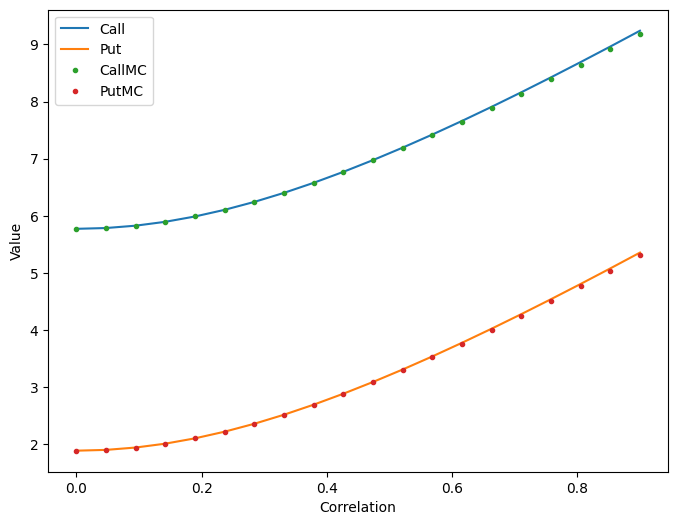

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(betas, valuesCall, label="Call");
plt.plot(betas, valuesPut, label="Put");
plt.plot(betas, valuesCallMC, '.', label="CallMC");
plt.plot(betas, valuesPutMC, '.', label="PutMC");
plt.xlabel("Correlation")
plt.ylabel("Value")
plt.legend();

Both the call and put increase in value with correlation as the effective volatility of the assets increases.

## Heterogenous Basket

Now we examine what happpens if we allow the assets to differ

In [19]:
valuesCallx = []
valuesPutx = []
valuesCallMCx = []
valuesPutMCx = []

# Volatilities differ
volatilities = np.linspace(0.1, 0.3, num_assets)

# Correlations differ
beta = 0.5
beta_vector = np.linspace(beta-0.4, beta+0.4, num_assets)
corr_matrix = beta_vector_to_corr_matrix(beta_vector)

# Dividends differ
dividend_yields = np.linspace(0.0, 0.04, num_assets)

svector = np.linspace(50, 150, 100)

for s in svector:

    # initial stock prices differ
    stock_prices = np.linspace(s-50, s+50, num_assets)

    vcall = basketCallOption.value(value_date, stock_prices, discount_curve, 
                                   dividend_curves, volatilities, corr_matrix)
    
    vput = basketPutOption.value(value_date, stock_prices, discount_curve, 
                                 dividend_curves, volatilities, corr_matrix)

    vcallmc = basketCallOption.value_mc(value_date, stock_prices, discount_curve, 
                                   dividend_curves, volatilities, corr_matrix)
    
    vputmc = basketPutOption.value_mc(value_date, stock_prices, discount_curve, 
                                 dividend_curves, volatilities, corr_matrix)

    valuesCallx.append(vcall)
    valuesPutx.append(vput)
    valuesCallMCx.append(vcallmc)
    valuesPutMCx.append(vputmc)

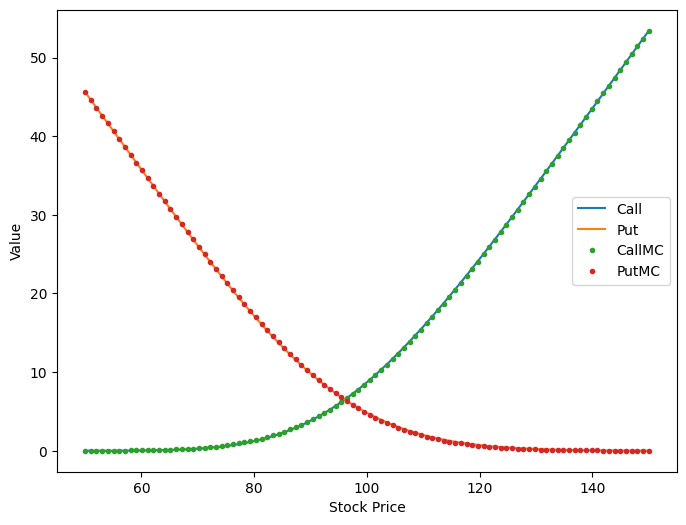

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(svector, valuesCallx, label="Call");
plt.plot(svector, valuesPutx, label="Put");
plt.plot(svector, valuesCallMCx, '.', label="CallMC");
plt.plot(svector, valuesPutMCx, '.', label="PutMC");
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend();

The price dependency does not change significantly as the assets become more heterogenous.

Copyright (c) 2020 Dominic O'Kane